In [1]:
import mod1
import importlib
importlib.reload(mod1)

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
list_name_tickers = [
    'MSFT',
    'AAPL',
    'FB',
    'AMZN',
    'NDAQ',
    'SPY'
]
list_name_tickers_pf = [
    'MSFT'
]
nb_days = 252
period = '252d'
df_stocks_prices = mod1.create_df_prices(list_name_tickers, period=period, cat='Open')

In [3]:
df_pf = df_stocks_prices[list_name_tickers_pf]
df_pf_diff = df_pf.diff()[1:]
df_pf_diff2 = df_pf_diff.diff()[1:]
df_pf_diff3 = df_pf_diff2.diff()[1:]

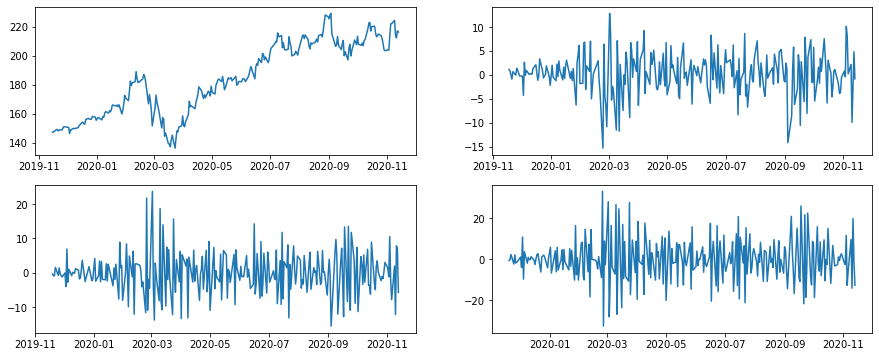

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(221)
plt.plot(df_pf)
plt.subplot(222)
plt.plot(df_pf_diff)
plt.subplot(223)
plt.plot(df_pf_diff2)
plt.subplot(224)
plt.plot(df_pf_diff3)
plt.show()

In [7]:
prices = df_pf.iloc[:,0].values
diff = df_pf_diff.iloc[:,0].values
diff2 = df_pf_diff2.iloc[:,0].values
diff3 = df_pf_diff3.iloc[:,0].values

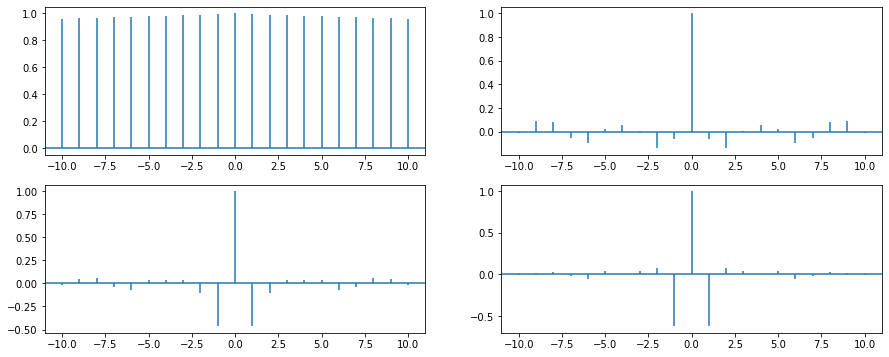

In [18]:
#autocorrelation
plt.figure(figsize=(15,6))
plt.subplot(221)
plt.acorr(prices)
plt.subplot(222)
plt.acorr(diff)
plt.subplot(223)
plt.acorr(diff2)
plt.subplot(224)
plt.acorr(diff3)
plt.show()

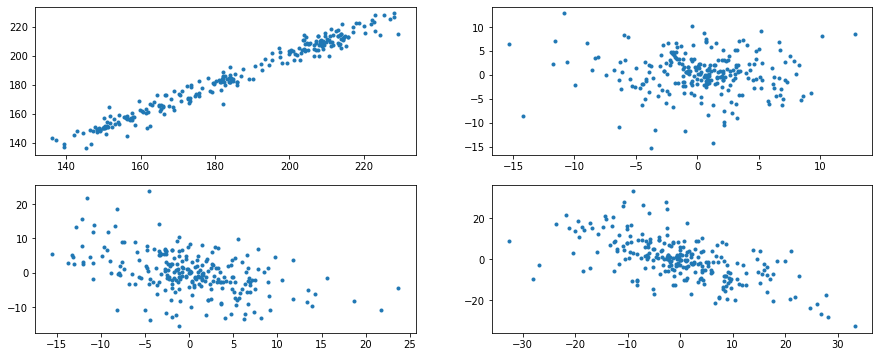

In [22]:
#autocovariance with lag
lag = 1
plt.figure(figsize=(15,6))
plt.subplot(221)
plt.plot(prices[:-lag],prices[lag:],'.')
plt.subplot(222)
plt.plot(diff[:-lag],diff[lag:],'.')
plt.subplot(223)
plt.plot(diff2[:-lag],diff2[lag:],'.')
plt.subplot(224)
plt.plot(diff3[:-lag],diff3[lag:],'.')
plt.show()

In [34]:
for i in range(5):
    print(ARIMA(prices, order=(1,0,i)).fit().summary())
    print('#'*90)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -723.251
Date:                Sun, 15 Nov 2020   AIC                           1452.502
Time:                        12:37:28   BIC                           1463.090
Sample:                             0   HQIC                          1456.763
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.3218     15.828     11.582      0.000     152.300     214.343
ar.L1          0.9882      0.010     97.063      0.000       0.968       1.008
sigma2        17.9455      1.324     13.554      0.0

In [31]:
for i in range(1,5):
    print(ARIMA(prices, order=(0,1,i)).fit().summary())
    print('#'*90)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -718.500
Date:                Sun, 15 Nov 2020   AIC                           1441.000
Time:                        12:35:19   BIC                           1448.051
Sample:                             0   HQIC                          1443.838
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0822      0.051     -1.617      0.106      -0.182       0.017
sigma2        17.9429      1.292     13.886      0.000      15.410      20.475
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [32]:
for i in range(1,5):
    print(ARIMA(prices, order=(1,1,i)).fit().summary())
    print('#'*90)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -717.483
Date:                Sun, 15 Nov 2020   AIC                           1440.967
Time:                        12:36:19   BIC                           1451.543
Sample:                             0   HQIC                          1445.223
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4975      0.320      1.555      0.120      -0.130       1.125
ma.L1         -0.5966      0.295     -2.020      0.043      -1.175      -0.018
sigma2        17.7972      1.293     13.766      0.0